## Notebook for permuting and double checking brain region orders

In [22]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import csv

# Spectrome imports
from spectrome.preprocess import permute
from spectrome.utils import path

Import `.mat` file and check shape, the mat file is important as a dictionary with keys as variable names

In [2]:
Cdk82 = loadmat('/home/axiezai/lab/spectral/data/changcai_controls.mat')
Cdk82['A_all_subjs_final'][:,:,0].shape

(82, 82)

Load region ordering.... sometimes txt file some times csv file T_T, need both target ordering and original ordering

In [3]:
# Load the ordering for the 82 regions first
julia_order_path = '/home/axiezai/lab/brain-scfc/regions_compare.xlsx'
Cdk86_order_path = '/home/axiezai/lab/brain-scfc/dk_RLLR.csv'
C82_order = pd.read_excel(julia_order_path, header = 0)
C82_order = C82_order.loc[:,'Julia82'].dropna(axis = 0, how = 'any')
# Of course the text doesn't match from people to people -________________-
#ctx = 'ctx-'
#for i in np.arange(0,82):
    #text = C82_order[i][1:-1-1]
    #C82_order[i] = ctx+text

In [4]:
C82_order

0                     lh-bankssts
1      lh-caudalanteriorcingulate
2          lh-caudalmiddlefrontal
3                       lh-cuneus
4                   lh-entorhinal
5                  lh-frontalpole
6                     lh-fusiform
7             lh-inferiorparietal
8             lh-inferiortemporal
9                       lh-insula
10            lh-isthmuscingulate
11            lh-lateraloccipital
12        lh-lateralorbitofrontal
13                     lh-lingual
14         lh-medialorbitofrontal
15              lh-middletemporal
16                 lh-paracentral
17             lh-parahippocampal
18             lh-parsopercularis
19               lh-parsorbitalis
20            lh-parstriangularis
21               lh-pericalcarine
22                 lh-postcentral
23          lh-posteriorcingulate
24                  lh-precentral
25                   lh-precuneus
26    lh-rostralanteriorcingulate
27        lh-rostralmiddlefrontal
28             lh-superiorfrontal
29            

In [5]:
Cdk86_order = pd.read_csv(Cdk86_order_path, header = 0)
Cdk86_order['DK86']

0                     rh-bankssts
1      rh-caudalanteriorcingulate
2          rh-caudalmiddlefrontal
3                       rh-cuneus
4                   rh-entorhinal
5                     rh-fusiform
6             rh-inferiorparietal
7             rh-inferiortemporal
8             rh-isthmuscingulate
9             rh-lateraloccipital
10        rh-lateralorbitofrontal
11                     rh-lingual
12         rh-medialorbitofrontal
13              rh-middletemporal
14             rh-parahippocampal
15                 rh-paracentral
16             rh-parsopercularis
17               rh-parsorbitalis
18            rh-parstriangularis
19               rh-pericalcarine
20                 rh-postcentral
21          rh-posteriorcingulate
22                  rh-precentral
23                   rh-precuneus
24    rh-rostralanteriorcingulate
25        rh-rostralmiddlefrontal
26             rh-superiorfrontal
27            rh-superiorparietal
28            rh-superiortemporal
29            

Change connectome data into Pandas Dataframe

In [6]:
empty_cdk = np.zeros([86,86])
Cdk86_df = pd.DataFrame(empty_cdk, index = Cdk86_order['DK86'],columns = Cdk86_order['DK86'])
Cjulia82_df = pd.DataFrame(Cdk82['A_all_subjs_final'][:,:,0], index = C82_order, columns = C82_order)

In [7]:
# restack Cjulia82_df to populate Cdk86
Cjulia82_sdf = Cjulia82_df.stack()
for index, data in Cjulia82_sdf.iteritems():
    #Cdk86_df[index[0]][index[1]] = data
    ctx_str1 = index[0]
    ctx_str2 = index[1]
    Cdk86_df[ctx_str1][ctx_str2] = data

In [14]:
Cdk86_df.values.shape

(86, 86)

Convert all subject's connectivity matrices into 86x86

In [16]:
n_subject = Cdk82['A_all_subjs_final'].shape[2]
Cdk86_individual = np.zeros([86,86,n_subject])
for i in np.arange(0,n_subject):
    cJulia_82 = Cdk82['A_all_subjs_final'][:,:,i]
    empty_cdk = np.zeros([86,86])
    Cdk86_df = pd.DataFrame(empty_cdk, index = Cdk86_order['DK86'], columns = Cdk86_order['DK86'])
    Cjulia82_df = pd.DataFrame(cJulia_82, index = C82_order, columns = C82_order)
    # Stack Cjulia82_df so we can populate Cdk86_individual
    Cjulia82_sdf = Cjulia82_df.stack()
    for index, data in Cjulia82_sdf.iteritems():
        Cdk86_df[index[0]][index[1]] = data
        
    Cdk86_individual[:,:,i] = Cdk86_df.values    

In [17]:
Cdk86_individual.shape

(86, 86, 39)

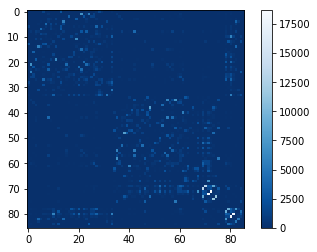

In [21]:
plt.imshow(Cdk86_individual[:,:,0], cmap = plt.cm.Blues_r)
plt.colorbar()

Save the connectivity matrices as h5 files:

In [28]:
# initialize h5 writing
hf = h5py.File('/home/axiezai/lab/spectral/data/spectrome/CDK86_individual.h5','w')
hf.create_dataset('CDK86_individual', data = Cdk86_individual)
#hf.create_dataset('CDK86_order', data = Cdk86_order)
hf.close()

# to read the h5 file:
# hf = h5py.File('CDK86_individual.h5', 'r')

# to see what's in the dataset, call keys:
# hf.keys()

# grab the dataset with the get method:
# cdk86_individual = hf.get('CDK86_individual')

# convert the returned h5 object to numpy array:
# cdk86_individual.array(cdk86_individual)
# hf.close()